In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
from keras.models import Model 
from keras.layers import Flatten,Dense 
from keras.applications.vgg16 import VGG16 
import matplotlib.pyplot as plot 
from glob import glob


In [9]:
IMAGESHAPE = [224, 224, 3] 
training_data = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
testing_data = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'


In [10]:
vgg_model = VGG16(input_shape=IMAGESHAPE, weights='imagenet', include_top=False) 


In [11]:
for each_layer in vgg_model.layers: 
	each_layer.trainable = False


In [19]:
classes = glob('/kaggle/input/chest-xray-pneumonia/chest_xray/train/*') 


In [20]:
flatten_layer = Flatten()(vgg_model.output) 
prediction = Dense(len(classes), activation='softmax')(flatten_layer) 


In [21]:
final_model = Model(inputs=vgg_model.input, outputs=prediction) 
final_model.summary() 


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [22]:
final_model.compile( 
loss='categorical_crossentropy', 
optimizer='adam', 
metrics=['accuracy'] 
)

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
train_datagen = ImageDataGenerator(rescale = 1./255, 
								shear_range = 0.2, 
								zoom_range = 0.2, 
								horizontal_flip = True) 
testing_datagen = ImageDataGenerator(rescale =1. / 255)


In [26]:
training_set = train_datagen.flow_from_directory('/kaggle/input/chest-xray-pneumonia/chest_xray/train', 
												target_size = (224, 224), 
												batch_size = 4, 
												class_mode = 'categorical') 


Found 5216 images belonging to 2 classes.


In [27]:
test_set = testing_datagen.flow_from_directory('/kaggle/input/chest-xray-pneumonia/chest_xray/test', 
											target_size = (224, 224), 
											batch_size = 4, 
											class_mode = 'categorical')


Found 624 images belonging to 2 classes.


In [30]:
fitted_model = final_model.fit( 
training_set, 
validation_data=test_set, 
epochs=5, 
steps_per_epoch=len(training_set), 
validation_steps=len(test_set) 
)

#Create a model file and store this model
final_model.save('our_model.h5')



Epoch 1/2
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 1661s 1s/step - accuracy: 0.9208 - loss: 0.2850 - val_accuracy: 0.8974 - val_loss: 0.3998
Epoch 2/2
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 0s 32us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


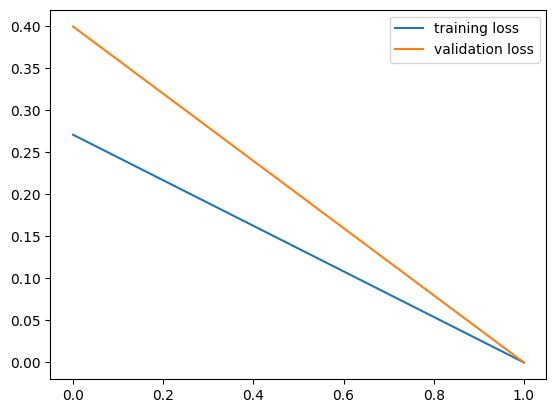

KeyError: 'acc'

<Figure size 640x480 with 0 Axes>

In [34]:
plot.plot(fitted_model.history['loss'], label='training loss') #Plotting the accuracies 
plot.plot(fitted_model.history['val_loss'], label='validation loss') 
plot.legend() 
plot.show() 
plot.savefig('LossVal_loss') 
plot.plot(fitted_model.history['acc'], label='training accuracy') 
plot.plot(fitted_model.history['val_acc'], label='validation accuracy') 
plot.legend() 
plot.show() 
plot.savefig('AccVal_acc') 
final_model.save('our_model.h5')

In [35]:
from keras.preprocessing import image
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
import numpy as np 
model=load_model('our_model.h5') #Loading our model 
img=image.load_img('/kaggle/input/chest-xray-pneumonia/chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg',target_size=(224,224)) 
imagee=image.img_to_array(img) #Converting the X-Ray into pixels 
imagee=np.expand_dims(imagee, axis=0) 
img_data=preprocess_input(imagee) 
prediction=model.predict(img_data) 
if prediction[0][0]>prediction[0][1]: #Printing the prediction of model. 
	print('Person is safe.') 
else: 
	print('Person is affected with Pneumonia.') 
print(f'Predictions: {prediction}') 


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
Person is safe.
Predictions: [[9.9988997e-01 1.1005294e-04]]
